# Cardiovacular Disease Prediction

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


About Dataset
Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [2]:
# # unzipping the file 
# file = 'archive.zip'
# from zipfile import ZipFile
# with ZipFile(file,'r') as zip:
#   zip.extractall()

In [3]:
# Importing Dataset
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
# Checking for null values
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
# As age is in days, converting it into years
df['age'] = (df['age']/365).round(0).astype('int')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
# Checking for outliers
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


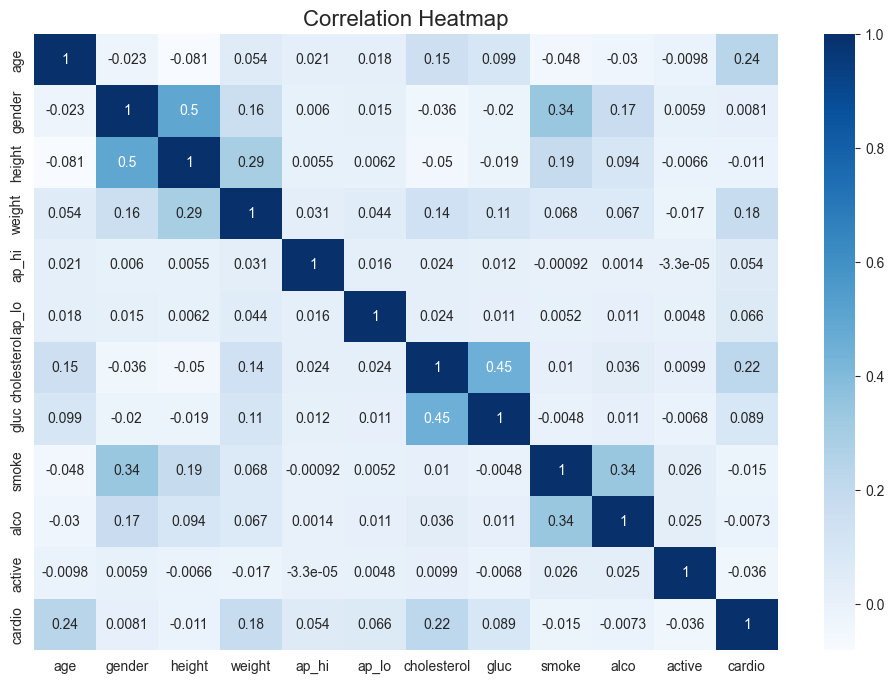

In [9]:
cor = df.corr()
plt.figure(figsize=(12, 8))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True) 
sns.heatmap(cor, cmap="Blues", annot=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [10]:
# Finding the negetive values
df[df['ap_hi']<0] 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,42,1,165,78.0,-100,80,2,1,0,0,1,0
16021,61,2,161,90.0,-115,70,1,1,0,0,1,0
20536,43,1,153,54.0,-100,70,1,1,0,0,1,0
23988,50,1,162,74.0,-140,90,1,1,0,0,1,1
25240,40,2,168,50.0,-120,80,2,1,0,0,0,1
35040,64,2,168,59.0,-150,80,1,1,0,0,1,1
46627,65,2,160,59.0,-120,80,1,1,0,0,0,0


In [11]:
# Finding the Negetive Values
df[df['ap_lo']<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
60106,62,1,167,74.0,15,-70,1,1,0,0,1,1


In [12]:
# Removing the Negetive values with absolute value
df[df['ap_hi']<0] = abs(df[df['ap_hi']<0])
df[df['ap_lo']<0] = abs(df[df['ap_lo']<0])

 According to the ICD-11, the international standard for diagnostic health information, the normal range for systolic blood pressure is 100-129 mmHg and for diastolic blood pressure is 60-84 mmHg. The highest value for systolic blood pressure is 180 mmHg or higher, which indicates a hypertensive crisis. The lowest value for systolic blood pressure is less than 90 mmHg, which indicates hypotension. The highest value for diastolic blood pressure is 120 mmHg or higher, which also indicates a hypertensive crisis. The lowest value for diastolic blood pressure is less than 60 mmHg, which may indicate hypotension or shock
 Increase them by 20+ and 10+ or 5+ respectively
 

In [13]:
df.drop(df[df["ap_lo"]<55].index, inplace = True)

In [14]:
df.drop(df[df['ap_lo'] > 150].index, inplace = True)

In [15]:
df.drop(df[df['ap_hi'] > 200].index, inplace = True)


In [16]:
df.drop(df[df['ap_hi'] < 80].index, inplace = True)


systolic blood pressure is usually higher than diastolic blood pressure. Systolic blood pressure measures the pressure in your arteries when your heart beats, while diastolic blood pressure measures the pressure in your arteries when your heart rests between beats. The difference between systolic and diastolic blood pressure is called pulse pressure, which reflects the strength and health of your heart. A normal pulse pressure is between 30 and 50 mmHg.

In [17]:
df[df["ap_hi"]<df["ap_lo"]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,52,1,156,65.0,120,150,2,1,0,0,1,0
2384,64,1,154,102.0,90,150,1,1,0,0,0,1
2990,60,2,182,90.0,80,140,3,3,0,0,1,1
3447,55,2,180,80.0,80,125,3,3,1,1,1,1
3623,60,1,160,83.0,80,120,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65758,39,1,165,65.0,80,120,1,1,0,0,1,0
66657,53,2,160,81.0,80,120,3,3,1,1,1,1
67421,64,1,153,74.0,80,130,1,1,0,0,1,1
67470,58,2,172,57.0,80,120,1,1,1,0,1,1


In [18]:
df[df["ap_hi"]==df["ap_lo"]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
12785,43,2,178,105.0,100,100,1,1,0,0,0,1
32190,64,1,162,120.0,100,100,1,1,0,0,1,0


In [19]:
df.drop(df[df["ap_hi"]<df["ap_lo"]].index, inplace = True)

df.drop(df[df["ap_hi"]==df["ap_lo"]].index, inplace = True)


<Axes: xlabel='cardio', ylabel='count'>

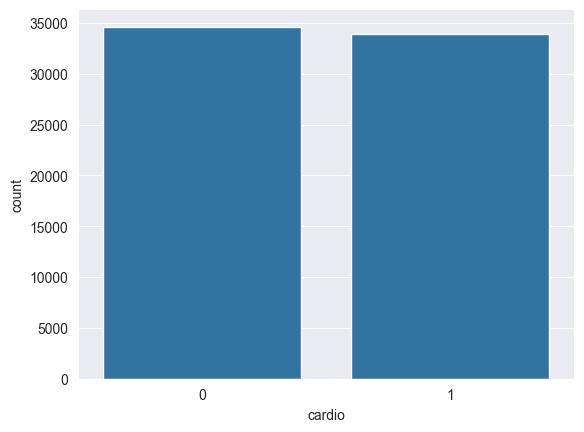

In [20]:
# Data Visualization
sns.countplot(x='cardio',data=df)

In [21]:
df.shape

(68541, 12)

In [22]:
X = df.drop('cardio',axis=1)
Y = df['cardio']



In [23]:
# Standard Scaling on X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.49183012,  1.36672758,  0.44444776, ..., -0.310472  ,
        -0.2373385 ,  0.49481511],
       [ 0.24695305, -0.73167471, -1.02220044, ..., -0.310472  ,
        -0.2373385 ,  0.49481511],
       [-0.19631685, -0.73167471,  0.07778571, ..., -0.310472  ,
        -0.2373385 , -2.02095689],
       ...,
       [-0.19631685,  1.36672758,  2.27775801, ..., -0.310472  ,
         4.21339146, -2.02095689],
       [ 1.13349286, -0.73167471, -0.16665565, ..., -0.310472  ,
        -0.2373385 , -2.02095689],
       [ 0.39470969, -0.73167471,  0.68888913, ..., -0.310472  ,
        -0.2373385 ,  0.49481511]])

In [24]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


# # Logistic Regression

In [25]:
# Logistic Regression
Y_train = np.ravel(Y_train)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)



LogisticRegression()

In [26]:
# Predicting the values
Y_pred = lr.predict(X_test)
score_lr = lr.score(X_test,Y_test)
score_lr

0.7225909986140492

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test.values,Y_pred)
cm_lr

array([[5381, 1491],
       [2312, 4525]], dtype=int64)

In [28]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values,Y_pred)


0.7225909986140492

# # Random Forest Classifier


In [29]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    random_state=0
)
rf.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [30]:
# Predicting the values
Y_pred = rf.predict(X_test)
score_rf = rf.score(X_test,Y_test)
score_rf

0.6980815522649354

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test.values,Y_pred)
cm_rf

array([[4812, 2060],
       [2079, 4758]], dtype=int64)

In [32]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values,Y_pred)


0.6980815522649354

# # Decision Tree Classifier

In [33]:

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)



DecisionTreeClassifier()

In [34]:
# Predicting the values
Y_pred = dt.predict(X_test)
score_dt = dt.score(X_test,Y_test)
score_dt


0.6276898387920344

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(Y_test.values,Y_pred)
cm_dt

array([[4455, 2417],
       [2687, 4150]], dtype=int64)

In [36]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values,Y_pred)


0.6276898387920344

In [37]:
# Comparing the models
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier'],
    'Score': [score_lr,score_rf,score_dt]
})
models.sort_values(by='Score',ascending=False)
models


,Model,Score
0,Logistic Regression,0.722591
1,Random Forest Classifier,0.698082
2,Decision Tree Classifier,0.627690


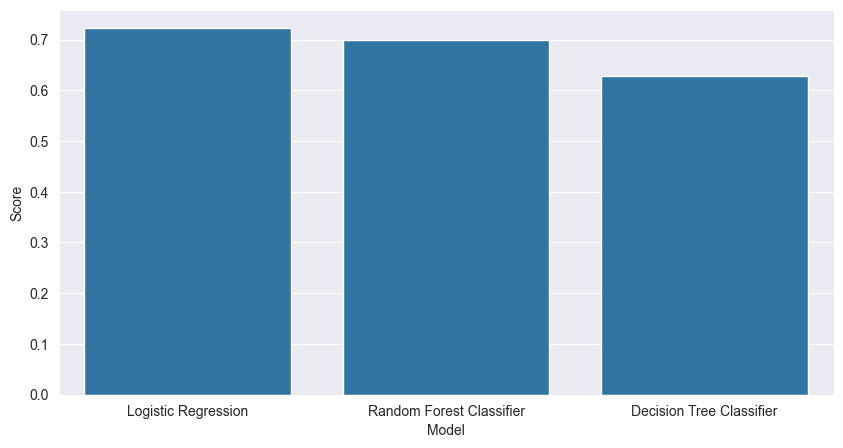

In [38]:
# plot the accuracy score
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='Score',data=models)
plt.show()